<a href="https://colab.research.google.com/github/jundeyo/DFC605-16/blob/master/%EA%B3%A0%EB%A0%A4%EB%8C%80%EB%A5%BC_%EC%B0%BE%EC%95%84%EB%9D%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **라이브러리 임포트**
- Python
- numpy
- keras
- matplotlib
- PIL
- seaborn
- skimage

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import keras.layers as layers
import keras.optimizers as optimizers
from keras.models import Model, load_model
from keras.utils import to_categorical
from keras.callbacks import LambdaCallback, ModelCheckpoint, ReduceLROnPlateau
import seaborn as sns
from PIL import Image
from skimage.transform import resize

import threading, random, os

# **데이터셋로드**
*   base.npy 고려대학교를 포함하여 여러가지 로고가 있는 전체이미지
*   base-label.npy 고려대학교 로고를 1로 나머지를 0으로 만든 라벨
*   korea.npy 고려대학교 로고를 슬라이싱한 이미지
*   korea-label.npy 고려대학교 로고를 1로 나머지를 0으로 만든 슬라이싱한 라벨

이미지 배열에 Sequence를 넣어주었고 데이터셋에 여러이미지가 포함되어 있음.








In [14]:
base = np.load('/content/drive/My Drive/Colab Notebooks/base.npy', allow_pickle=True).astype(np.float32)
base_label = np.load('/content/drive/My Drive/Colab Notebooks/base-label.npy', allow_pickle=True).astype(np.float32)
korea = np.load('/content/drive/My Drive/Colab Notebooks/korea.npy', allow_pickle=True)
korea_label = np.load('/content/drive/My Drive/Colab Notebooks/korea-label.npy', allow_pickle=True)

print(base.shape, base_label.shape)
print(korea.shape, korea_label.shape)

(15, 720, 1280, 3) (15, 720, 1280)
(15,) (15,)


# base  : base.npy 고려대학교를 포함하여 여러가지 로고가 있는 전체이미지

In [17]:
base


array([[[[0.972549  , 0.972549  , 0.972549  ],
         [0.972549  , 0.972549  , 0.972549  ],
         [0.972549  , 0.972549  , 0.972549  ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[0.972549  , 0.9764706 , 0.96862745],
         [0.96862745, 0.9764706 , 0.9647059 ],
         [0.98039216, 0.98039216, 0.9882353 ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[0.972549  , 0.972549  , 0.9647059 ],
         [0.9764706 , 0.9843137 , 0.9764706 ],
         [0.9607843 , 0.9764706 , 0.95686275],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        ...,

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]

# base_label : base-label.npy 고려대학교 로고를 1로 나머지를 0으로 만든 라벨

In [18]:
base_label

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

# korea : korea.npy 고려대학교 로고를 슬라이싱한 이미지

In [11]:
korea

array([array([[[0.9764706 , 0.99607843, 1.        ],
        [0.9647059 , 0.9843137 , 0.99607843],
        [0.9647059 , 0.9843137 , 0.99607843],
        ...,
        [0.9764706 , 0.99607843, 0.99607843],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.8117647 , 0.827451  , 0.83137256],
        [0.8352941 , 0.8509804 , 0.85490197],
        [0.87058824, 0.89411765, 0.89411765],
        ...,
        [1.        , 0.9882353 , 0.99607843],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.1254902 , 0.10980392, 0.10588235],
        [0.11764706, 0.10196079, 0.09803922],
        [0.17254902, 0.15686275, 0.15294118],
        ...,
        [1.        , 0.9882353 , 0.99215686],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0.99215686, 0.99215686],
        [0.9921

# korea_label : korea-label.npy 고려대학교 로고를 1로 나머지를 0으로 만든 슬라이싱한 라벨

In [12]:
korea_label

array([array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]),
       array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]),
       array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]),
       array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]]),
    

# 1. 이미지 배치처리
# 2. 랜덤 슬라이싱 처리
# 3. 정반대방향 이미지 생성 처리

In [0]:
PANNEL_SIZE = 224

class BatchIndices(object):
    """
    Generates batches of shuffled indices.
    # Arguments
        n: number of indices
        bs: batch size
        shuffle: whether to shuffle indices, default False 
    
    """
    def __init__(self, n, bs, shuffle=False):
        self.n,self.bs,self.shuffle = n,bs,shuffle
        self.lock = threading.Lock()
        self.reset()

    def reset(self):
        self.idxs = (np.random.permutation(self.n) 
                     if self.shuffle else np.arange(0, self.n))
        self.curr = 0

    def __next__(self):
        with self.lock:
            if self.curr >= self.n: self.reset()
            ni = min(self.bs, self.n-self.curr)
            res = self.idxs[self.curr:self.curr+ni]
            self.curr += ni
            return res
        
class segm_generator(object):
    """
    Generates batches of sub-images.
    # Arguments
        x: array of inputs
        y: array of targets
        bs: batch size
        out_sz: dimension of sub-image
        train: If true, will shuffle/randomize sub-images
        korealogo: If true, allow sub-images to contain targets.
    """
    def __init__(self, x, y, bs=64, out_sz=(224,224), train=True, korealogo=True):
        self.x, self.y, self.bs, self.train = x,y,bs,train
        self.korealogo = korealogo
        self.n = x.shape[0]
        self.ri, self.ci = [], []
        for i in range(self.n):
            ri, ci, _ = x[i].shape
            self.ri.append(ri), self.ci.append(ci) 
        self.idx_gen = BatchIndices(self.n, bs, train)
        self.ro, self.co = out_sz
        self.ych = self.y.shape[-1] if len(y.shape)==4 else 1

    def get_slice(self, i,o):
        start = random.randint(0, i-o) if self.train else (i-o)
        return slice(start, start+o)

    def get_item(self, idx):
        slice_r = self.get_slice(self.ri[idx], self.ro)
        slice_c = self.get_slice(self.ci[idx], self.co)
        x = self.x[idx][slice_r, slice_c]
        y = self.y[idx][slice_r, slice_c]
        if self.train and (random.random()>0.5): 
            y = y[:,::-1]
            x = x[:,::-1]
        if not self.korealogo and np.sum(y)!=0:
            return None

        return x, to_categorical(y, num_classes=2).reshape((y.shape[0] * y.shape[1], 2))

    def __next__(self):
        idxs = self.idx_gen.__next__()
        items = []
        for idx in idxs:
            item = self.get_item(idx)
            if item is not None:
                items.append(item)
        if not items:
            return None
        xs,ys = zip(*tuple(items))
        return np.stack(xs), np.stack(ys)
        
def seg_gen_mix(x1, y1, x2, y2, tot_bs=4, prop=0.1, out_sz=(224,224), train=True):
    """
    Mixes generator output. The second generator is set to skip images that contain any positive targets.
    # Arguments
        x1, y1: input/targets for korealogo sub-images
        x2, y2: input/targets for whole images
        tot_bs: total batch size
        prop: proportion of total batch size consisting of first generator output
    """
    n1 = int(tot_bs*prop)
    n2 = tot_bs - n1
    sg1 = segm_generator(x1, y1, n1, out_sz = out_sz ,train=train)
    sg2 = segm_generator(x2, y2, n2, out_sz = out_sz ,train=train, korealogo=False)
    while True:
        out1 = sg1.__next__()
        out2 = sg2.__next__()
        if out2 is None:
            yield out1
        else:
            yield np.concatenate((out1[0], out2[0])), np.concatenate((out1[1], out2[1]))

# 고려대 로그를 찾고 1로 표현함.
# 1:0.34기준으로 즉 1장은 고려대학교 로그를 찾고, 그 외는 찾지 않음.

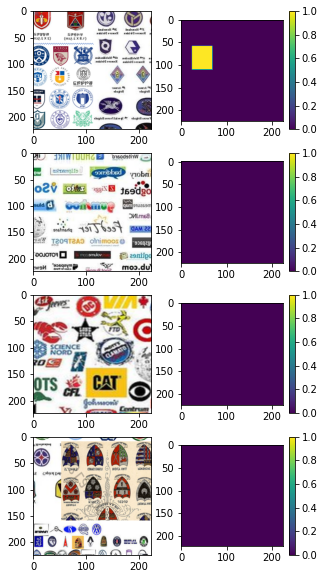

In [35]:
# korealogo : not_korealogo = 1 : 2 (0.34)
gen_mix = seg_gen_mix(korea, korea_label, base, base_label, tot_bs=4, prop=0.34, out_sz=(PANNEL_SIZE, PANNEL_SIZE))

X, y = next(gen_mix)

plt.figure(figsize=(5, 10))
for i, img in enumerate(X):
    plt.subplot(X.shape[0], 2, 2*i+1)
    plt.imshow(X[i])
    plt.subplot(X.shape[0], 2, 2*i+2)
    plt.colorbar()
    plt.imshow(y[i][:,1].reshape((PANNEL_SIZE, PANNEL_SIZE)))